# 规则的决策边界

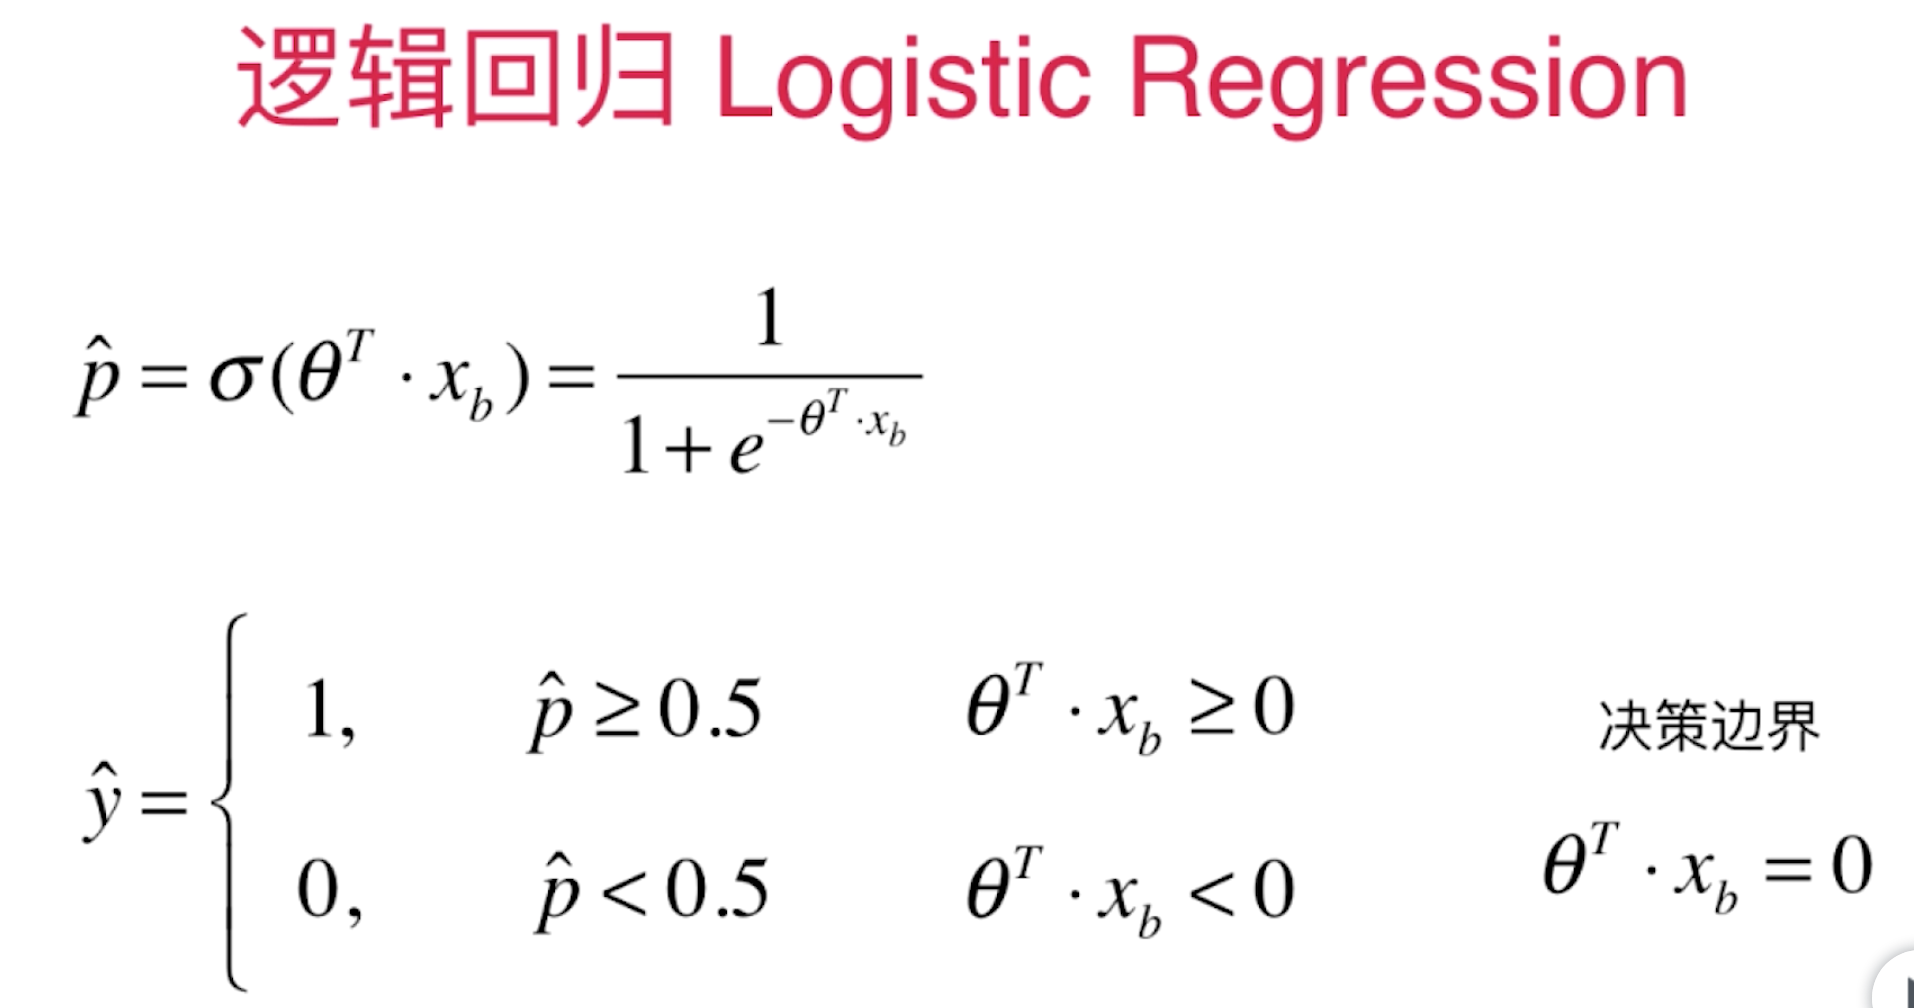

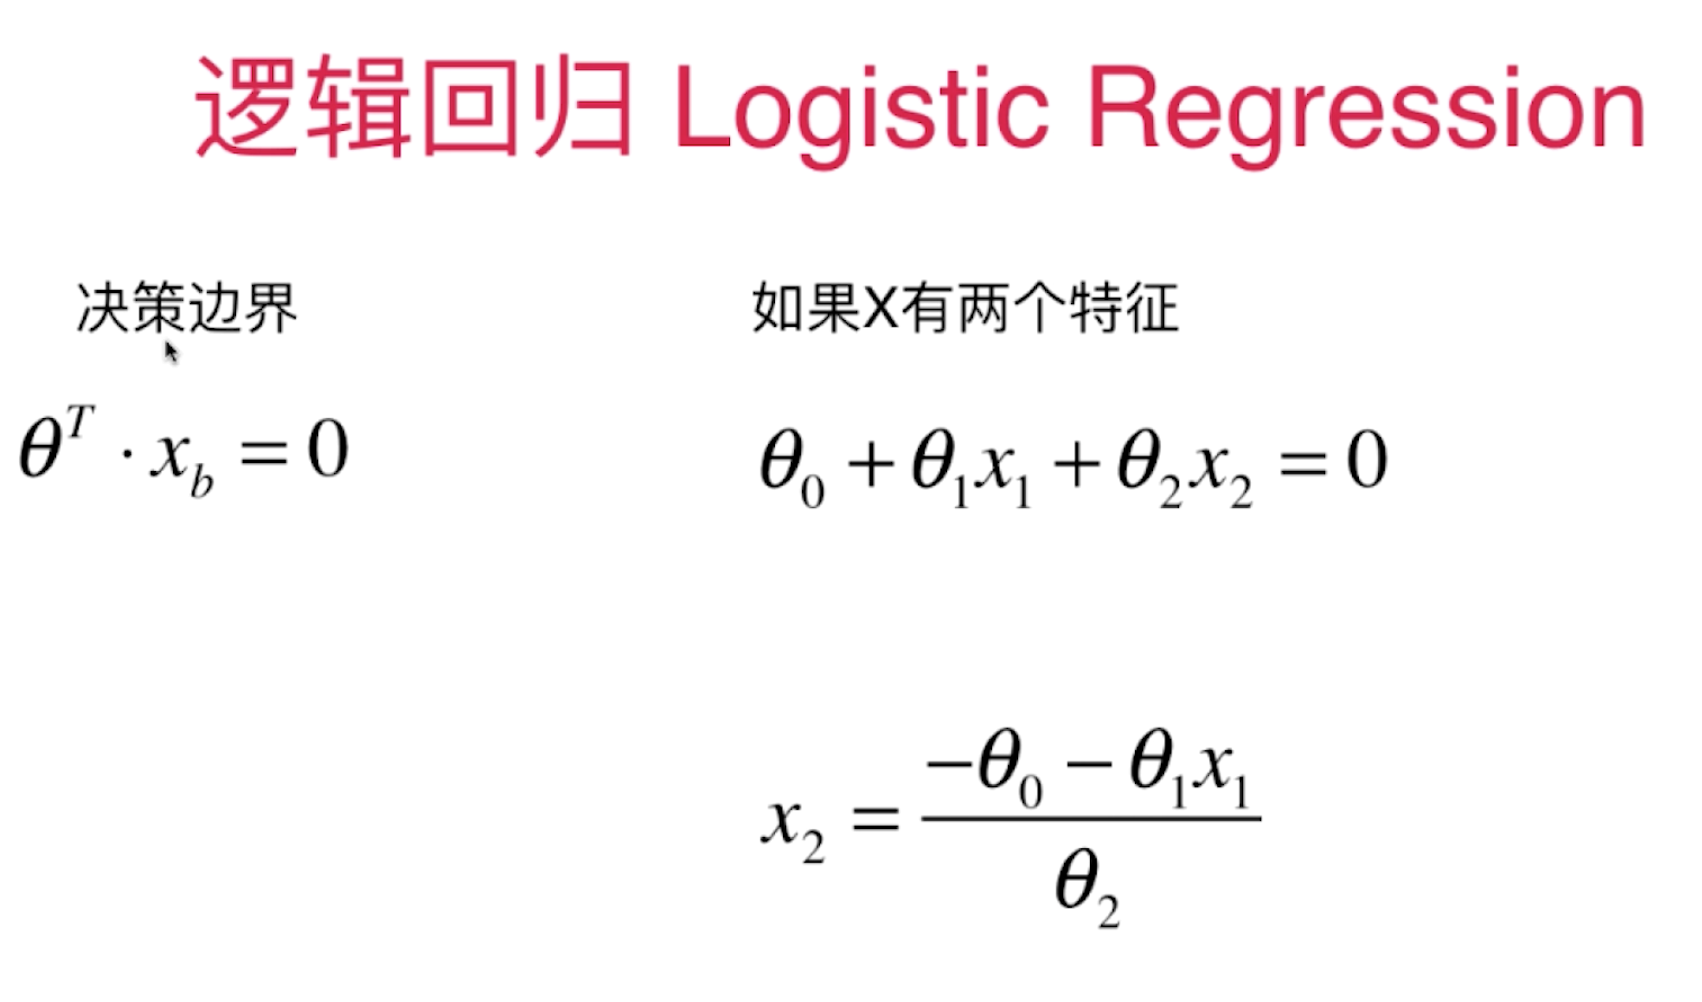

# 不规则的决策边界

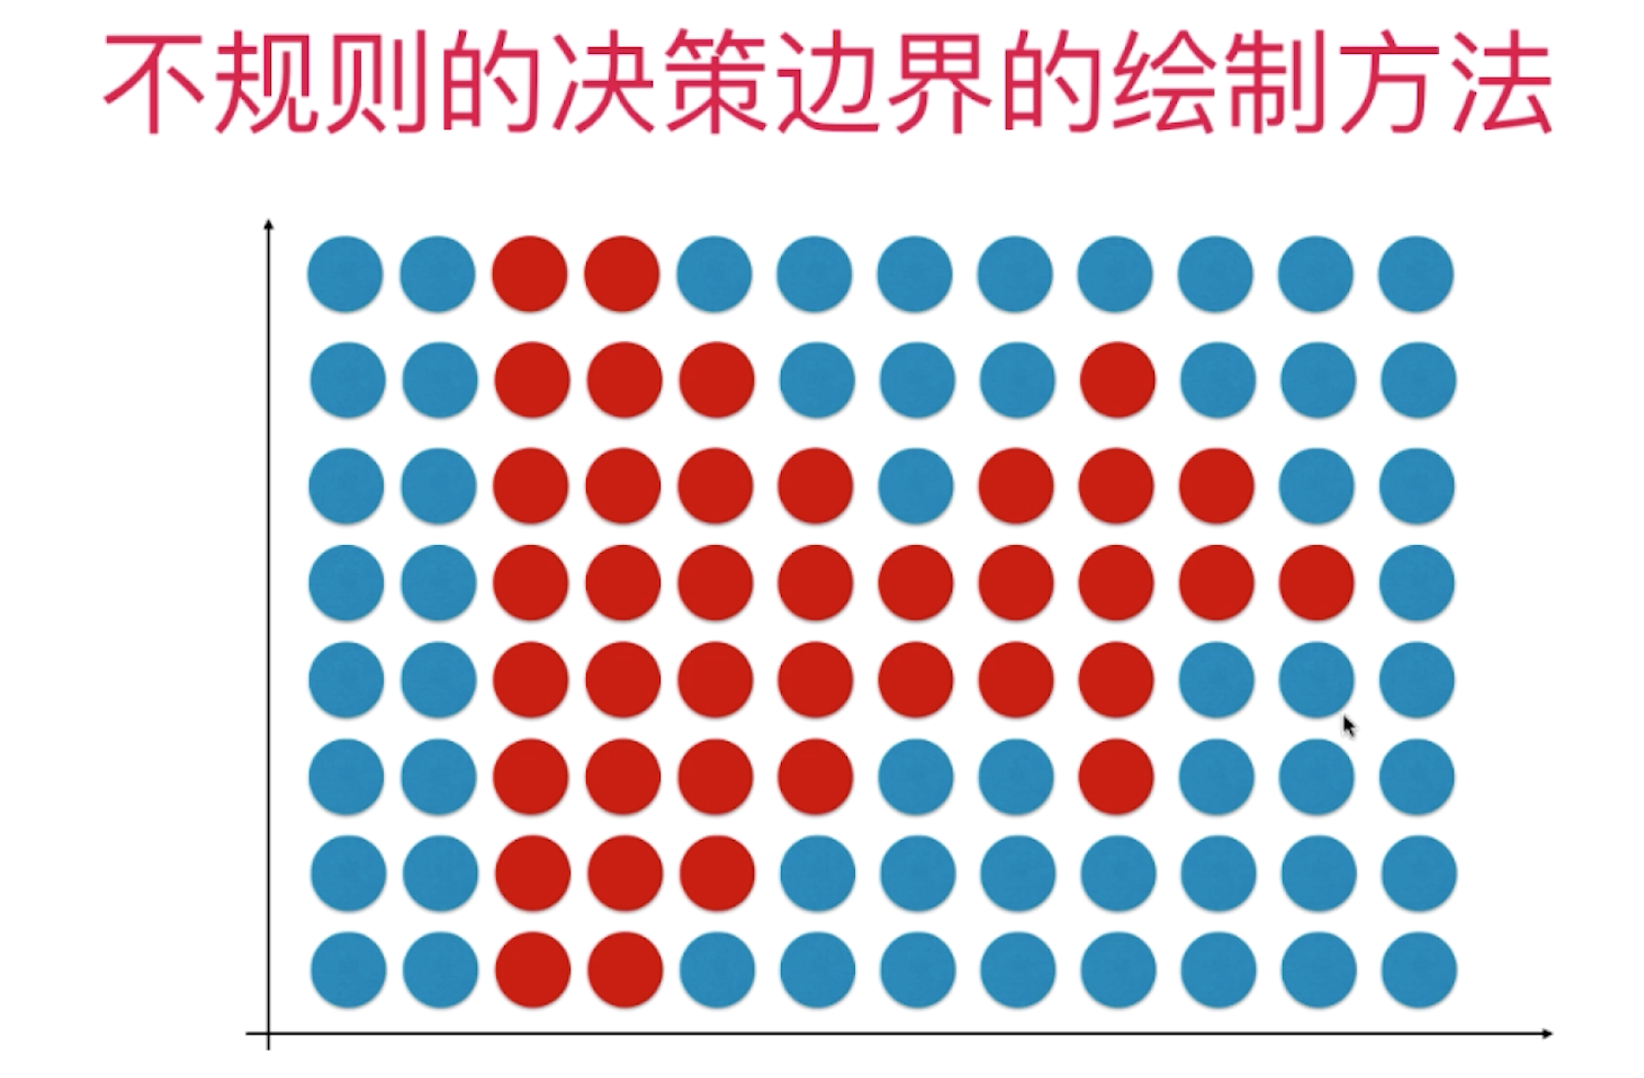

In [4]:
import numpy as np
from sklearn.metrics import accuracy_score

class LogisticRegression:
    
    def __init__(self):
        """初始化Logistic Regression"""
        self.coef_ = None            #系数,theta 1-n
        self.interception_ = None  #截距,theta 0
        self._theta = None           #theta 0-n

    def _sigmoid(self, t):
        return 1. / (1. + np.exp(-t))
    
    def fit(self, X_train, y_train, eta=0.01, n_iters=1e4):
        """根据训练数据集X_train, y_train, 使用梯度下降法训练 Logistic Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"

        def J(theta, X_b, y): 
            """损失函数"""
            y_hat = self._sigmoid(X_b.dot(theta))
            try:
                return np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)) / len(y)
            except:
                return float('inf')

        def dJ(theta, X_b, y): 
            """损失函数的梯度（偏导）, 向量化"""
            return X_b.T.dot(self._sigmoid(X_b.dot(theta)) - y) / len(y)

        def gredient_descent(X_b, y, initial_theta, eta, epsilon=1e-8, n_iters = 1e4):
            """依据梯度搜索的过程"""
            theta = initial_theta
            cur_iter = 0
            while cur_iter < n_iters:      ### i_iter 执行次数，n_iter 次数上限
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):   #浮点数判断 == 0
                    break
                cur_iter += 1
            return theta

        X_b = np.hstack( [np.ones((len(X_train), 1)), X_train] )    # np.ones((3,5))传进去的是元组，3行5列的1矩阵；或者np.ones(10)
        initial_theta = np.zeros( X_b.shape[1] )
        self._theta = gredient_descent(X_b, y_train, initial_theta, eta)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self
    
    def predict_proba(self, X_predict):
        """给定待预测数据集X_predict, 返回X_predict的结果概率向量"""
        assert self.interception_ is not None and self.coef_ is not None, \
            "must fit before predict !"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"
        
        X_b = np.hstack( [np.ones( (len(X_predict), 1) ), X_predict] )
        return self._sigmoid(X_b.dot(self._theta))
    
    def predict(self, X_predict):
        """给定待预测数据集X_predict, 返回X_predict的结果向量"""
        assert self.interception_ is not None and self.coef_ is not None, \
            "must fit before predict !"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"
        
        proba = self.predict_proba(X_predict)
        return np.array(proba >= 0.5, dtype='int')
    
    def score(self, X_test, y_test):
        """根据测试数据集X_test 和 y_test确定当前模型的准确度"""
        y_predict = self.predict(X_test)
        return accuracy_score(y_test, y_predict)
    
    def __repr__(self):
        return "LogisticRegression()"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2, : 2]
y = y[y<2]

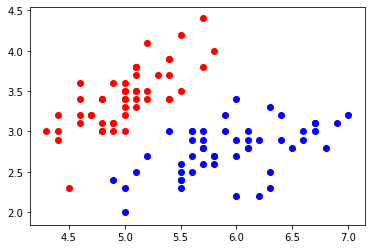

In [2]:
plt.scatter(X[y==0,0], X[y==0,1],color="red")
plt.scatter(X[y==1,0],X[y==1,1],color="blue")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [7]:
log_reg.score(X_test, y_test)

1.0

In [8]:
log_reg.coef_

array([ 3.01749692, -5.03046934])

In [9]:
log_reg.interception_

-0.6827383698993109

# 逻辑回归求出来的线，是决策边界

In [10]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.interception_) / log_reg.coef_[1]

In [11]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

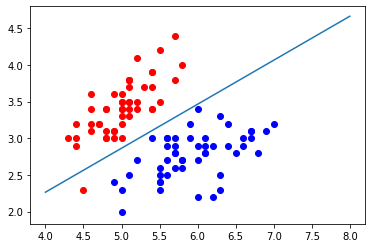

In [13]:
plt.scatter(X[y==0,0], X[y==0,1],color="red")
plt.scatter(X[y==1,0],X[y==1,1],color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

### 有个红色点在线以下，但是之前score求得是1，说明这个点在训练集不在测试集中

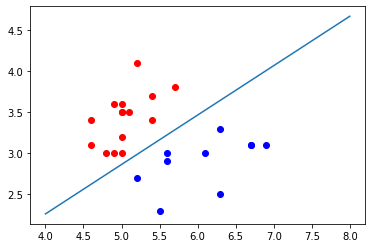

In [14]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1],color="red")
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1],color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


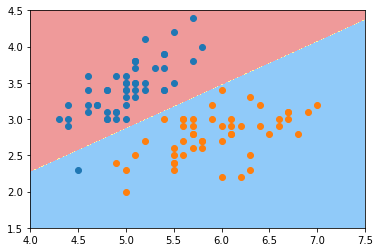

In [15]:
# 绘制不规则决策边界的函数
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### knn的决策边界

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
knn_clf.score(X_test, y_test)

1.0

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


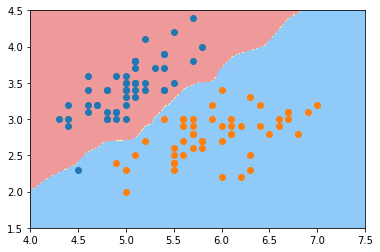

In [20]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [21]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


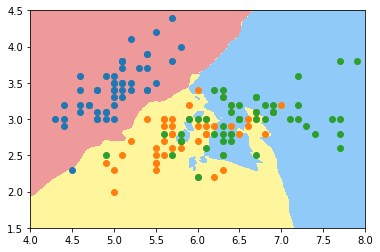

In [22]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0, 1])
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1, 1])
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2, 1])
plt.show()

### 上面弯弯曲曲的就是过拟合的表现
### knn的n_neighbors越小就模型就越复杂

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


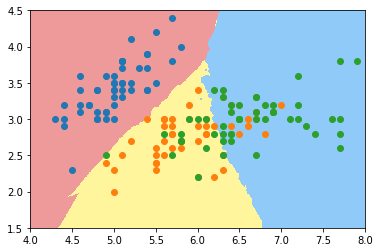

In [23]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:, :2], iris.target)

plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0, 1])
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1, 1])
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2, 1])
plt.show()